In [119]:
import cv2
import numpy as np
from numpy import shape
import matplotlib.pyplot as plt 
from image_extractor import feature_extract, statistic_analysis
from scipy.stats import skew, kurtosis

# image_dir  = '../input/color-corrected/Color_Corrected_512x512/Agglutinated/image (17).JPG'
# image_dir  = '../input/color-corrected/Color_Corrected_512x512/Brittle/image (1).JPG'
# image_dir = '../input/color-corrected/Color_Corrected_512x512/Plated_Purple/image (10).JPG'
# image_dir = '../input/color-corrected/Color_Corrected_512x512/Compartmentalized_PartiallyPurple/image (16).JPG'
# image_dir = './input/color-corrected/Color_Corrected_512x512/Compartmentalized_Brown/image (3).JPG'
# image_dir = './input/color-corrected/Color_Corrected_512x512/Plated_White/image (72).JPG'
# image_dir = '/Users/lochuynhquang/Desktop/Color_Corrected_512x512/Plated_PartiallyPurple/image (48).JPG'
# image_dir = '/Users/lochuynhquang/Desktop/Color_Corrected_512x512/Plated_Purple/image (43).JPG'

# image_dir = '../input/color-corrected/Color_Corrected_512x512/Plated_Brown/image (5).JPG'

# image_dir = './input/color-corrected/Color_Corrected_512x512/Compartmentalized_Slaty/image (1).JPG'
# image_dir = './input/color-corrected/Color_Corrected_512x512/Moldered/image (7).JPG'

# image_dir  = '/Users/lochuynhquang/Desktop/Color_Corrected_512x512/Plated_PartiallyPurple/image (30).JPG'

rd = np.random.randint(0,100)

image_dir = '/Users/lochuynhquang/Desktop/Color_Corrected_512x512/Plated_PartiallyPurple/image (' + str(rd) + ').JPG'
plt.rcParams["figure.figsize"] = (10,12)


In [120]:
image_dir

'/Users/lochuynhquang/Desktop/Color_Corrected_512x512/Plated_PartiallyPurple/image (75).JPG'

In [141]:
extractor = feature_extract()
image_bgr = cv2.imread(image_dir)
# extractor.extract(image_bgr)
extractor.pre_process(image_bgr)
# extractor.extract_compress_HSV()

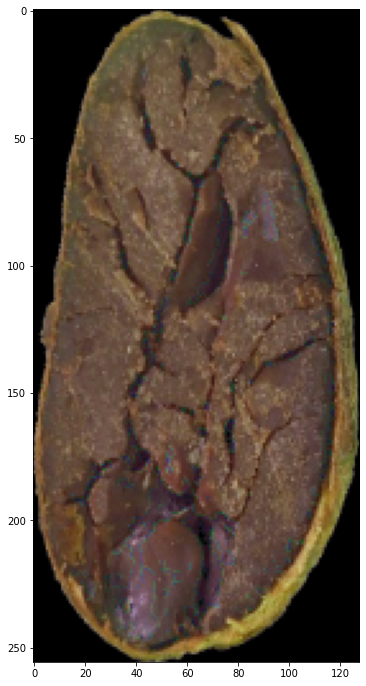

In [142]:
plt.imshow(extractor.image_rgb)
plt.show()

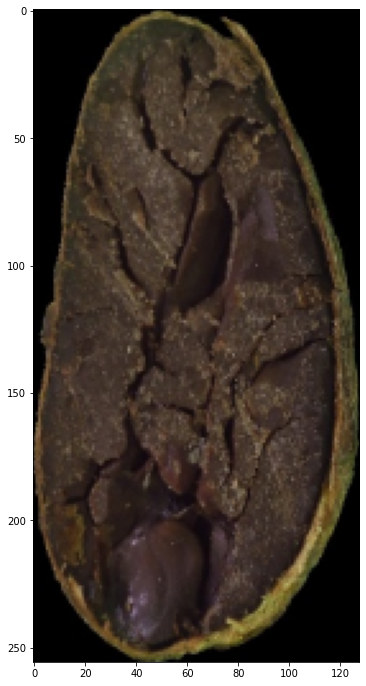

In [143]:
image_rgb = extractor.origin_rgb;
plt.imshow(image_rgb)
plt.show()

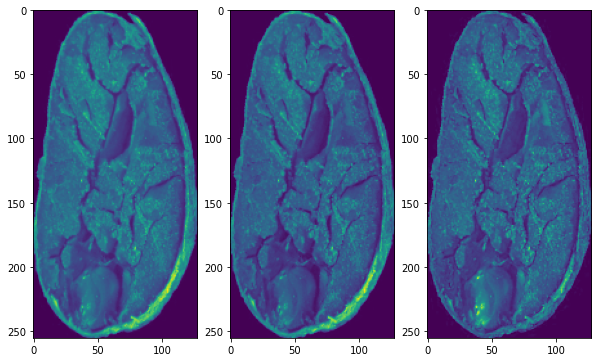

In [144]:
r, g, b = cv2.split(image_rgb)
plt.subplot(1,3,1)
plt.imshow(r)
plt.subplot(1,3,2)
plt.imshow(g)
plt.subplot(1,3,3)
plt.imshow(b)
plt.show()

In [145]:
# clahe6 = cv2.createCLAHE(2.0, (8,8))

# clahe_r = clahe.apply(r);
# clahe_g = clahe.apply(g);
# clahe_b = clahe.apply(b);
# plt.subplot(1,3,1)
# plt.imshow(clahe_r)
# plt.subplot(1,3,2)
# plt.imshow(clahe_g)
# plt.subplot(1,3,3)
# plt.imshow(clahe_b)
# plt.show()

In [146]:
# clahe_rgb = cv2.merge([clahe_r, clahe_g, clahe_b])
# plt.imshow(clahe_rgb)
# plt.show()

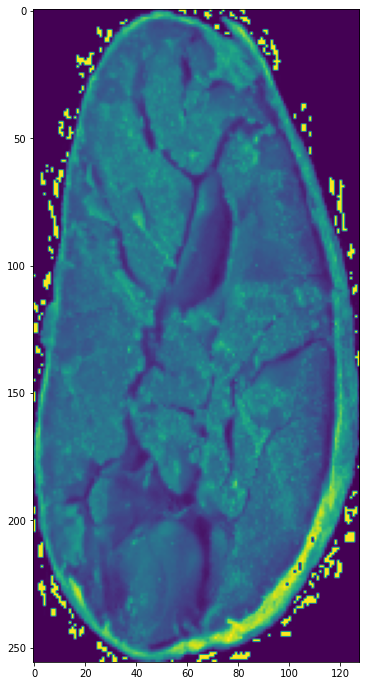

In [158]:
rmb = 2*r-b
plt.imshow(rmb)
plt.show()

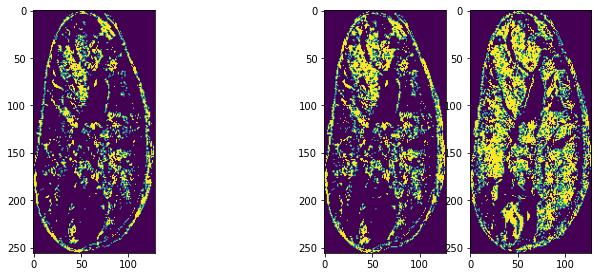

In [148]:
ret, thr = cv2.threshold(r, 80,255, cv2.THRESH_TOZERO)
ret, thr = cv2.threshold(thr, 110,255, cv2.THRESH_TOZERO_INV)
ret, thr = cv2.threshold(thr, 80,255, cv2.THRESH_BINARY)

ret, thg = cv2.threshold(g, 60,255, cv2.THRESH_TOZERO)
ret, thg = cv2.threshold(thg, 90,255, cv2.THRESH_TOZERO_INV)
ret, thg = cv2.threshold(thg, 60,255, cv2.THRESH_BINARY)

ret, thb = cv2.threshold(b, 40,255, cv2.THRESH_TOZERO)
ret, thb = cv2.threshold(thb, 60,255, cv2.THRESH_TOZERO_INV)
ret, thb = cv2.threshold(thb, 40,255, cv2.THRESH_BINARY)


plt.subplot(1,4,1)
plt.imshow(thr)
# plt.subplot(1,4,2)
# plt.imshow(thr2)
plt.subplot(1,4,3)
plt.imshow(thg)
plt.subplot(1,4,4)
plt.imshow(thb)
plt.show()

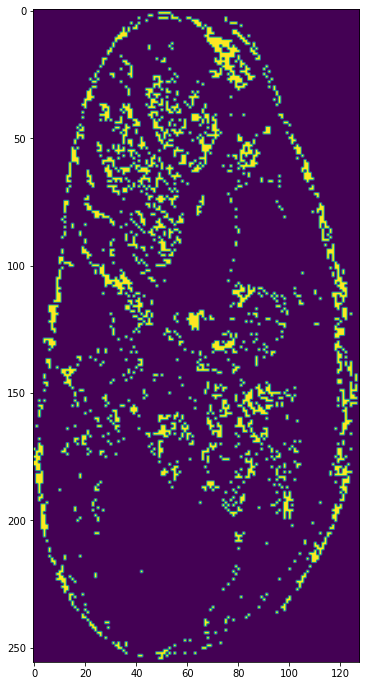

In [149]:
minrb = np.min([thr,thb, thb], axis=0)
np.shape(minrb)
plt.imshow(minrb)
plt.show()

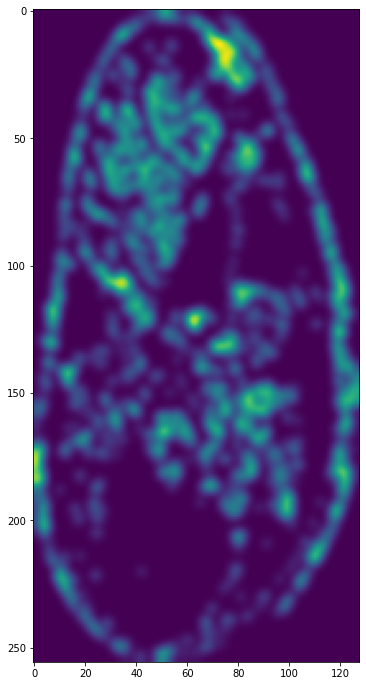

In [150]:
blur = cv2.GaussianBlur(minrb, (11,11), 0)
plt.imshow(blur)
plt.show()

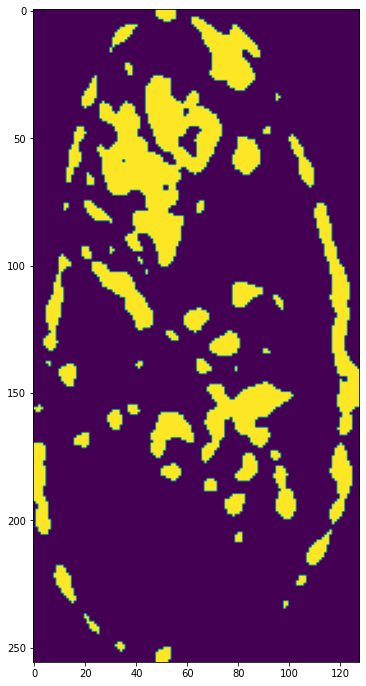

In [151]:
ret, thbin = cv2.threshold(blur, 50, 255, cv2.THRESH_BINARY)
plt.imshow(thbin)
plt.show()

20


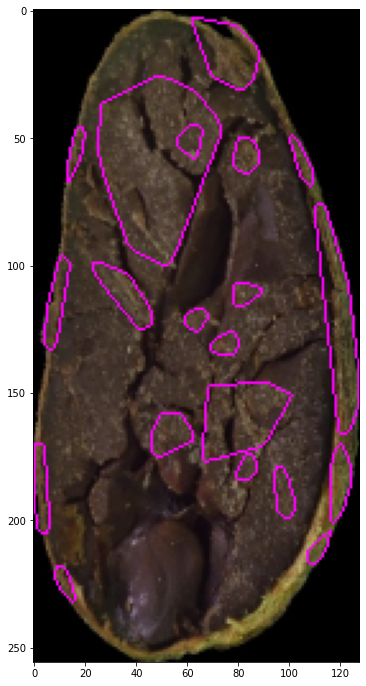

In [152]:
image_rgb = extractor.origin_rgb
contours, hr = cv2.findContours(thbin, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
shape = []
stat = []
for cnt in contours:
#         cv2.rectangle(image_rgb, (x,y), (x+w,y+h), (255,255,0), 1)
    x,y,w,h = cv2.boundingRect(cnt)
    # if (x<5) or (x+w>123):
    #     continue
    convexHull = cv2.convexHull(cnt)
    convexhull_area = cv2.contourArea(convexHull)
    if convexhull_area < 49:
        continue
    if len(cnt)<5:
        continue
    if len(convexHull)<5:
        continue

    feature = image_rgb[y:y+h, x:x+w, :]
    stat.append(statistic_analysis(feature))
    shape.append([w,h])
    cv2.drawContours(image_rgb, [convexHull], -1, (255,0,255), 1)

n = len(stat)
print(n)
    
plt.imshow(image_rgb)
plt.show()

In [153]:
print(np.shape(shape))
print(np.shape(stat))
ft = np.concatenate([shape, stat], axis=1)
print(type(ft))
print(np.shape(ft))
ft = ft.tolist()

(20, 2)
(20, 12)
<class 'numpy.ndarray'>
(20, 14)


In [154]:
mean = np.mean(ft, axis=0)
stddev = np.std(ft,axis=0)
skewness = skew(ft,axis=0)
kurtosises = kurtosis(ft,axis=0)